In [1]:
import torch
import torch.nn as nn

import numpy as np

import matplotlib.pyplot as plt

import data_utils
import models
import train_utils
import utils

/home/hamidi/current-work/HAR/2023-07-clMetaEquiv/env/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Rotated MNIST: a separate model for each angle (task)

## Utility functions

In [2]:
def plot_losses(losses, config):
    for loss in losses:
        plt.plot(loss['train_loss'], label=str(loss['rot'])+"°")

        plt.title('Training loss vs. Number of training steps')
        plt.xlabel('Number of training steps')
        plt.ylabel('Training loss')
        #plt.xscale('log')
        plt.legend()
        path = '0_SeparateModel/{}_{}_{}deg_training-loss-vs-number-of-training-steps-MNIST.pdf'.format(
            config['setting'],
            config['model_name'],
            loss['rot']
        )
        plt.savefig(path)
        plt.show()


In [3]:
def plot_accuracies(accuracies, config):
    rots, accs = [], []
    for d in accuracies:
        rots.append(d['rot'])
        accs.append(d['test_acc'])

    plt.plot(rots, accs, color='b', marker='o')
    ticks = rots

    plt.title('Evaluation accuracy vs. Rotation angle')
    plt.xlabel('Rotation angle (task)')
    plt.ylabel('Evaluation accuracy')
    plt.xticks(ticks, ticks)
    #plt.xscale('log')
    #plt.legend()
    #plt.grid()
    path = '0_SeparateModel/{}_{}_evaluation-accuracy-vs-rotation-angle-MNIST_{}deg.pdf'.format(
        config['setting'],
        config['model_name'],
        config['per_task_rotation']
    )
    plt.savefig(path)
    plt.show()

In [4]:
def plot_accuracies_mean_std(accuracies, config, title='Evaluation accuracy vs. Rotation angle', xlabel='Rotation angle (task)'):
    rots = accuracies.keys()
    means = []
    stds = []
    for rot, accs in accuracies.items():
        means.append(np.mean(accs))
        stds.append(np.std(accs))

    plt.errorbar(rots, means, yerr=stds, capsize=4, elinewidth=1, markeredgewidth=1, fmt='-o')
    #plt.plot(rots, accs, color='b', marker='o')
    ticks = list(rots)
    print(ticks)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Evaluation accuracy')
    plt.xticks(ticks, ticks)
    #plt.xscale('log')
    #plt.legend()
    #plt.grid()
    path = '0_SeparateModel/{}_{}_evaluation-accuracy-vs-rotation-angle-MNIST_{}deg_{}runs.pdf'.format(
        config['setting'],
        config['model_name'],
        config['per_task_rotation'],
        config['rounds']
    )
    plt.savefig(path)
    plt.show()

In [5]:
def plot_losses_over_runs(train_losses_over_rotangles_and_runs, config):
    for rotangle, losses in train_losses_over_rotangles_and_runs.items():
        mean_losses = np.mean(losses, axis=0)
        std_losses = np.std(losses, axis=0)
        #print(mean_losses[0])
        #print(std_losses[0])

        plt.plot(list(range(len(mean_losses))), mean_losses)
        plt.fill_between(list(range(len(mean_losses))), mean_losses-2*std_losses, mean_losses+2*std_losses, color='#888888', alpha=0.4)


        plt.title('Training loss vs. Number of training steps')
        plt.xlabel('Number of training steps')
        plt.ylabel('Training loss')
        #plt.xscale('log')
        #plt.legend()
        filename = '{}_{}_{}deg_training-loss-vs-number-of-training-steps-MNIST.pdf'.format(
            config['setting'],
            config['model_name'],
            rotangle 
        )
        plt.savefig(filename)
        plt.show()



## SimpleNN model

In [ ]:
config = {
    # ---COMMON----
    'setting': 'SeparateModel',
    'model_name': 'SimpleNN',
    'num_tasks': 8, 'per_task_rotation': 45,
    #'trial': TRIAL_ID, 'exp_dir': EXP_DIR,\
    #'memory_size': 200, 'dataset': DATASET, 'device': DEVICE, 'momentum': 0.8,\
    #'mlp_hiddens': HIDDENS, 'dropout': 0.2, 'lr_decay': 0.8, 'stable_sgd': False,\
    'batch_size': 64,\
    'rounds': 10
}

### Training

In [ ]:
train_loaders, test_loaders = data_utils.create_rotated_mnist_task(config['num_tasks'], config['per_task_rotation'], config['batch_size'])

accuracy_history_canonical = []
losses_canonical = []

for train_loader, test_loader in zip(train_loaders, test_loaders):
    print("training A NEW MODEL with Rotated MNIST angle", train_loader['rot'], "°...")

    # Define the neural network, criterion, and optimizer
    model = models.SimpleNN()
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

    # Select a subset of training examples
    #indices = torch.randperm(len(train_dataset))[:num_examples]
    #train_subset = torch.utils.data.Subset(train_dataset, indices)

    #plot_class_distribution(train_subset, title='Class Distribution of MNIST Subset')

    #train_loader = DataLoader(train_subset, batch_size=64, shuffle=True)
    #test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

    lc = train_utils.train_model(model, train_loader['loader'], criterion, optimizer)
    losses_canonical.append({'train_loss':lc, 'rot': train_loader['rot']})

    accuracy = train_utils.evaluate_model(model, test_loader['loader'])
    accuracy_history_canonical.append({'test_acc':accuracy, 'rot':train_loader['rot']})


training A NEW MODEL with Rotated MNIST angle -45 °...
epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
training A NEW MODEL with Rotated MNIST angle 0 °...
epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
training A NEW MODEL with Rotated MNIST angle 45 °...
epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
training A NEW MODEL with Rotated MNIST angle 90 °...
epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
training A NEW MODEL with Rotated MNIST angle 135 °...
epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
training A NEW MODEL with Rotated MNIST angle 180 °...
epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
training A NEW MODEL with Rotated MNIST angle 225 °...
epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
training A NEW MODEL with Rotated MNIST angle 270 °...
epoch 0
epoch 1
epoch 2
epoch 3
epoch 4


### Plotting training process

In [ ]:
plot_losses(losses_canonical, config)

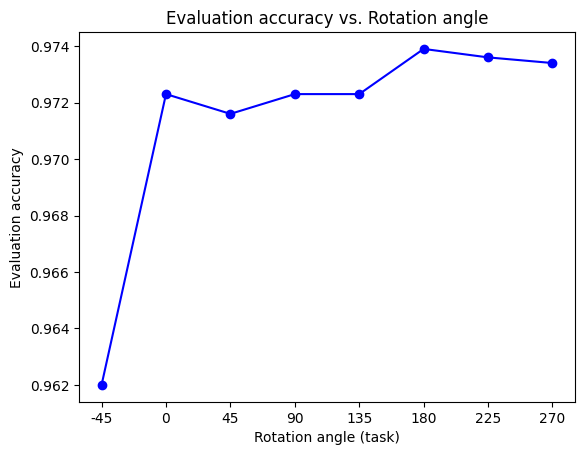

In [ ]:
plot_accuracies(accuracy_history_canonical, config)

### Multiple runs

In [ ]:
train_loaders, test_loaders = data_utils.create_rotated_mnist_task(config['num_tasks'], config['per_task_rotation'], config['batch_size'])

accs_over_rotangles_and_runs = {} 
train_losses_over_rotangles_and_runs = {}

rounds = config['rounds']
for seed in range(rounds):
    utils.set_seed(seed)

    for train_loader, test_loader in zip(train_loaders, test_loaders):
        print("training A NEW MODEL with Rotated MNIST angle", train_loader['rot'], "°...")

        # Define the neural network, criterion, and optimizer
        model = models.SimpleNN()
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

        train_loss = train_utils.train_model(model, train_loader['loader'], criterion, optimizer)
        train_losses_over_rotangles_and_runs.setdefault(train_loader['rot'], []).append(train_loss)

        accuracy = train_utils.evaluate_model(model, test_loader['loader'])
        accs_over_rotangles_and_runs.setdefault(test_loader['rot'], []).append(accuracy)



Random seed set as 0
training A NEW MODEL with Rotated MNIST angle -45 °...
epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
training A NEW MODEL with Rotated MNIST angle 0 °...
epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
training A NEW MODEL with Rotated MNIST angle 45 °...
epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
training A NEW MODEL with Rotated MNIST angle 90 °...
epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
training A NEW MODEL with Rotated MNIST angle 135 °...
epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
training A NEW MODEL with Rotated MNIST angle 180 °...
epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
training A NEW MODEL with Rotated MNIST angle 225 °...
epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
training A NEW MODEL with Rotated MNIST angle 270 °...
epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
Random seed set as 1
training A NEW MODEL with Rotated MNIST angle -45 °...
epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
training A NEW MODEL with Rotated MNIST angle 0 °...
epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
training A NEW

In [ ]:
print(accs_over_rotangles_and_runs)

{-45: [0.972, 0.9698, 0.9714, 0.9659, 0.9687, 0.9735, 0.9746, 0.9739, 0.9706, 0.9719], 0: [0.9715, 0.9733, 0.9683, 0.9703, 0.9696, 0.9712, 0.9743, 0.9734, 0.9731, 0.972], 45: [0.9734, 0.9708, 0.9703, 0.9659, 0.9716, 0.9693, 0.9742, 0.969, 0.968, 0.9718], 90: [0.9688, 0.9719, 0.9752, 0.969, 0.9747, 0.9687, 0.9704, 0.9677, 0.9744, 0.9662], 135: [0.9728, 0.9723, 0.9688, 0.973, 0.9753, 0.974, 0.9695, 0.9735, 0.973, 0.9696], 180: [0.9685, 0.9727, 0.97, 0.9693, 0.975, 0.9691, 0.9703, 0.9729, 0.9675, 0.9709], 225: [0.9707, 0.9718, 0.9641, 0.9683, 0.9711, 0.9689, 0.9713, 0.9718, 0.9716, 0.9673], 270: [0.9723, 0.9758, 0.9709, 0.9745, 0.9733, 0.9753, 0.9762, 0.9702, 0.9708, 0.9656]}


In [ ]:
filename = '{}_{}_accs_over_rotangles_and_runs_{}deg_{}_runs.json'.format(
    config['setting'],
    config['model_name'],
    config['per_task_rotation'],
    config['rounds']
)
utils.save_accs(accs_over_rotangles_and_runs, config, filename=filename)

[-45, 0, 45, 90, 135, 180, 225, 270]


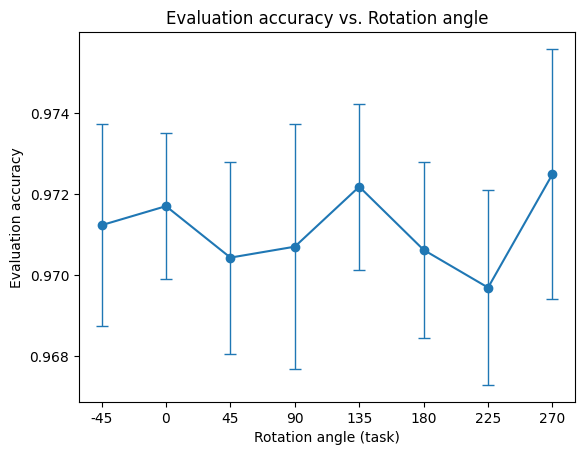

In [ ]:
plot_accuracies_mean_std(accs_over_rotangles_and_runs, config)

In [ ]:
plot_losses_over_runs(train_losses_over_rotangles_and_runs, config)

In [ ]:
print(train_losses_over_rotangles_and_runs[45][0])

## Net (SimpleCNN)

In [6]:
config = {
    # ---COMMON----
    'setting': 'SeparateModel',
    'model_name': 'SimpleCNN',
    'num_tasks': 8, 'per_task_rotation': 45,
    #'trial': TRIAL_ID, 'exp_dir': EXP_DIR,\
    #'memory_size': 200, 'dataset': DATASET, 'device': DEVICE, 'momentum': 0.8,\
    #'mlp_hiddens': HIDDENS, 'dropout': 0.2, 'lr_decay': 0.8, 'stable_sgd': False,\
    'batch_size': 64,\
    'rounds': 10
}

### Multiple runs

In [7]:
train_loaders, test_loaders = data_utils.create_rotated_mnist_task(config['num_tasks'], config['per_task_rotation'], config['batch_size'])

accs_over_rotangles_and_runs = {} 
train_losses_over_rotangles_and_runs = {}

rounds = config['rounds']
for seed in range(rounds):
    utils.set_seed(seed)

    for train_loader, test_loader in zip(train_loaders, test_loaders):
        print("training A NEW MODEL with Rotated MNIST angle", train_loader['rot'], "°...")

        # Define the neural network, criterion, and optimizer
        model = models.SimpleCNN()
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

        train_loss = train_utils.train_model(model, train_loader['loader'], criterion, optimizer)
        train_losses_over_rotangles_and_runs.setdefault(train_loader['rot'], []).append(train_loss)

        accuracy = train_utils.evaluate_model(model, test_loader['loader'])
        accs_over_rotangles_and_runs.setdefault(test_loader['rot'], []).append(accuracy)



Random seed set as 0
training A NEW MODEL with Rotated MNIST angle -45 °...
epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
training A NEW MODEL with Rotated MNIST angle 0 °...
epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
training A NEW MODEL with Rotated MNIST angle 45 °...
epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
training A NEW MODEL with Rotated MNIST angle 90 °...
epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
training A NEW MODEL with Rotated MNIST angle 135 °...
epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
training A NEW MODEL with Rotated MNIST angle 180 °...
epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
training A NEW MODEL with Rotated MNIST angle 225 °...
epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
training A NEW MODEL with Rotated MNIST angle 270 °...
epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
Random seed set as 1
training A NEW MODEL with Rotated MNIST angle -45 °...
epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
training A NEW MODEL with Rotated MNIST angle 0 °...
epoch 0
epoch 1
epoch 2
epoch 3
epoch 4
training A NEW

In [8]:
print(accs_over_rotangles_and_runs)

{-45: [0.9883, 0.9895, 0.9894, 0.9884, 0.9893, 0.9885, 0.99, 0.9889, 0.9885, 0.9894], 0: [0.9887, 0.9904, 0.9905, 0.9907, 0.989, 0.9901, 0.9903, 0.9911, 0.9907, 0.9903], 45: [0.9876, 0.9893, 0.9883, 0.9898, 0.9899, 0.9903, 0.9885, 0.9877, 0.9887, 0.9882], 90: [0.9915, 0.989, 0.9911, 0.9892, 0.991, 0.9882, 0.9912, 0.9905, 0.9904, 0.9902], 135: [0.9897, 0.9894, 0.9884, 0.9893, 0.9897, 0.9892, 0.9889, 0.9889, 0.9895, 0.9886], 180: [0.9894, 0.9913, 0.9884, 0.9901, 0.9916, 0.9908, 0.9916, 0.9895, 0.9901, 0.9916], 225: [0.9896, 0.9883, 0.99, 0.9894, 0.9887, 0.9898, 0.9893, 0.9893, 0.9906, 0.9894], 270: [0.9909, 0.9911, 0.9917, 0.9907, 0.9899, 0.9921, 0.9899, 0.9908, 0.9914, 0.9912]}


In [9]:
filename = '0_SeparateModel/{}_{}_accs_over_rotangles_and_runs_{}deg_{}_runs.json'.format(
    config['setting'],
    config['model_name'],
    config['per_task_rotation'],
    config['rounds']
)
utils.save_accs(accs_over_rotangles_and_runs, config, filename=filename)

[-45, 0, 45, 90, 135, 180, 225, 270]


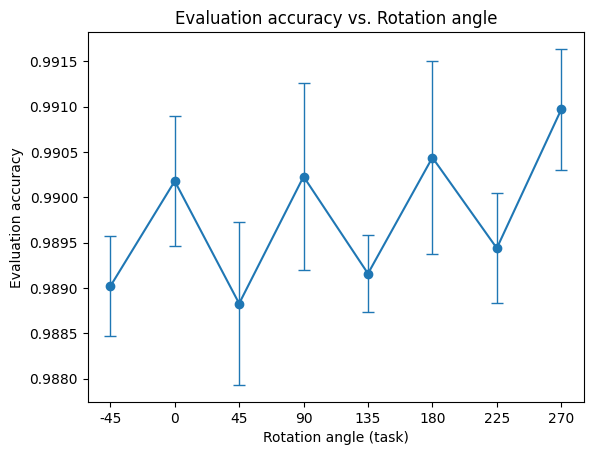

In [10]:
plot_accuracies_mean_std(accs_over_rotangles_and_runs, config)

**Some interpretations of the above plot**


"Batch Normalization (BN) [14 ] is one of the most influential innovations in optimizing deep neural networks as it **substantially reduces the training time and the dependence of the training on initialization.**" (An Investigation into Neural Net Optimization via Hessian Eigenvalue Density)